<div style="border-radius:10px; padding: 15px; background-color: #a9defe; font-size:130%; text-align:left">

<h2 align="left"><font color=#006e8a>HousePricePrediction</font></h2>

<div style="border-radius:10px; padding: 15px; background-color: #a9defe; font-size:130%; text-align:left">

<h2 align="left"><font color=#006e8a>About data:</font></h2>


**App :** The name of the app

**Category :** The category of the app

**Rating :** The rating of the app in the Play Store

**Reviews :** The number of reviews of the app

**Size :** The size of the app

**Install :** The number of installs of the app

**Type :** The type of the app (Free/Paid)

**Price :** The price of the app (0 if it is Free)

**Content Rating :** The appropiate target audience of the app

**Genres:** The genre of the app

**Last Updated :** The date when the app was last updated

**Current Ver :** The current version of the app

**Android Ver :** The minimum Android version required to run the app

<a id="libraries"></a>
# <b><span style='color:#a9defe'>Step 1 |</span><span style='color:#006e8a'> Importing Necessary Libraries</span></b>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

C:\Users\HP\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


<a id="libraries"></a>
# <b><span style='color:#a9defe'>Step 1 |</span><span style='color:#006e8a'> Dataset Overview</span></b>

In [2]:
df = pd.read_csv('housing.csv')
df.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17653,-121.88,37.25,24.0,968.0,240.0,631.0,250.0,2.8636,240300.0,<1H OCEAN
3085,-118.50,35.70,18.0,3303.0,814.0,986.0,522.0,1.5957,101400.0,INLAND
6166,-117.93,34.09,34.0,2192.0,431.0,1376.0,428.0,3.9861,163900.0,<1H OCEAN
2677,-115.52,32.98,32.0,1615.0,382.0,1307.0,345.0,1.4583,58600.0,INLAND
3716,-118.41,34.20,32.0,2734.0,654.0,2209.0,610.0,3.5164,217200.0,<1H OCEAN


In [3]:
df.shape

(20640, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


<a id="libraries"></a>
# <b><span style='color:#a9defe'>Step 3 |</span><span style='color:#006e8a'> Exploratory Data Analysis</span></b>

In [5]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
df.duplicated().any()

False

In [8]:
num_values = df.select_dtypes(include=np.number).columns.tolist()
num_values

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

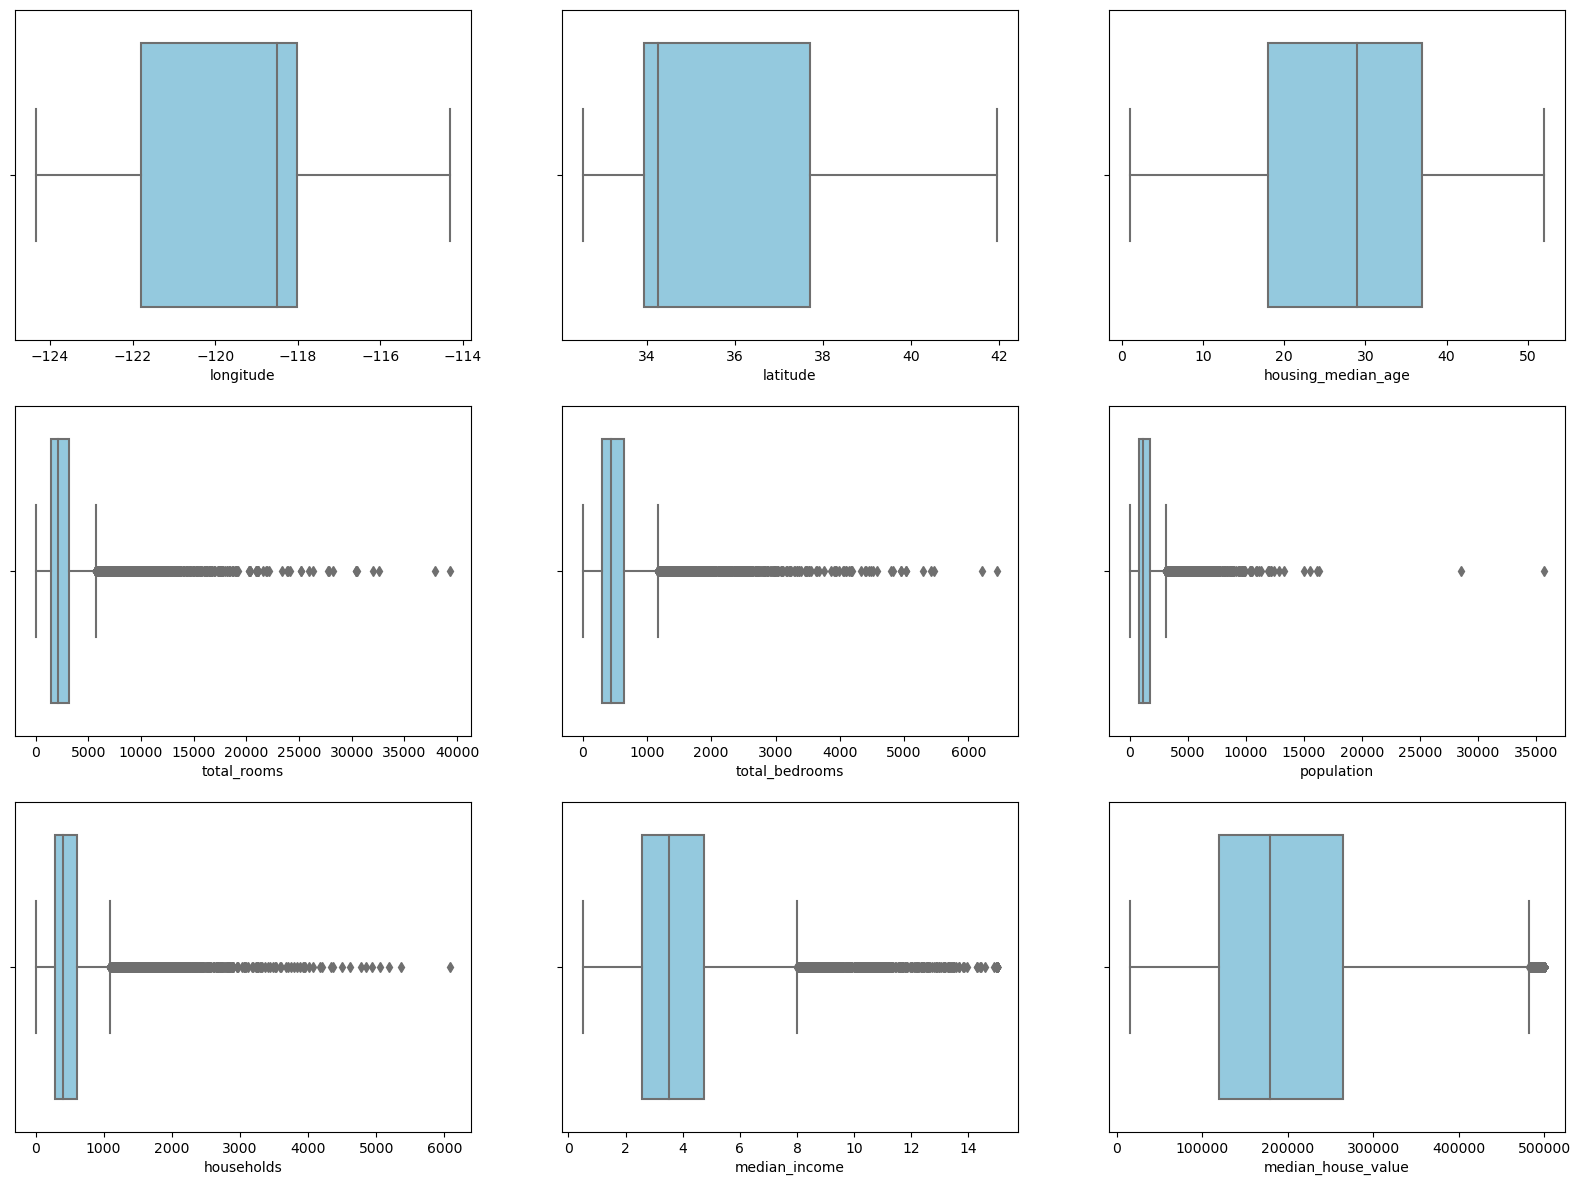

In [9]:
plt.figure(figsize=(20,30))
for i in range(len(num_values)):
    plt.subplot(len(num_values)-3, 3, i+1)
    sns.boxplot(data=df, x=num_values[i], color = 'skyblue')

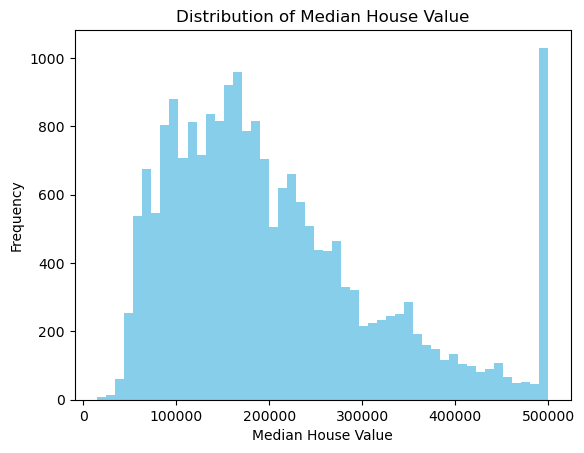

In [10]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(df["median_house_value"], bins=50, color='skyblue')
plt.xlabel("Median House Value")
plt.ylabel("Frequency")
plt.title("Distribution of Median House Value")
plt.show()

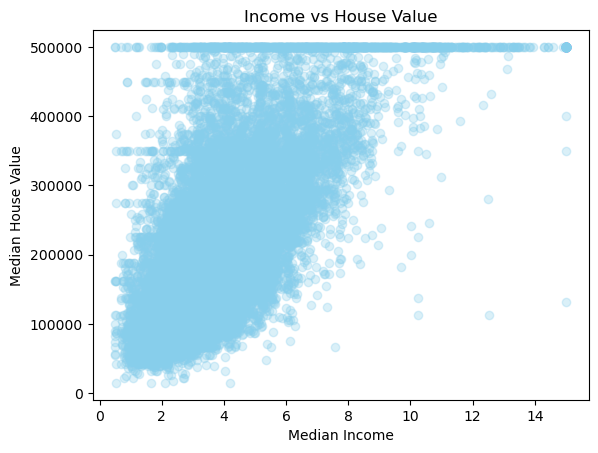

In [11]:
plt.figure()
plt.scatter(df["median_income"], df["median_house_value"], alpha=0.3, color='skyblue')
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.title("Income vs House Value")
plt.show()

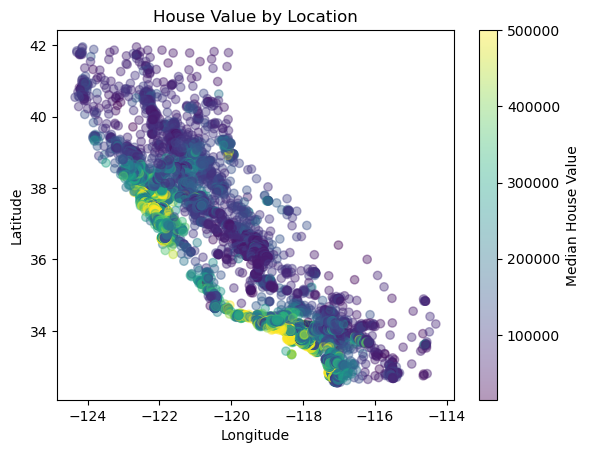

In [12]:
plt.figure()
plt.scatter(
    df["longitude"],
    df["latitude"],
    c=df["median_house_value"],
    alpha=0.4,
    cmap="viridis"
)
plt.colorbar(label="Median House Value")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("House Value by Location")
plt.show()

<Figure size 640x480 with 0 Axes>

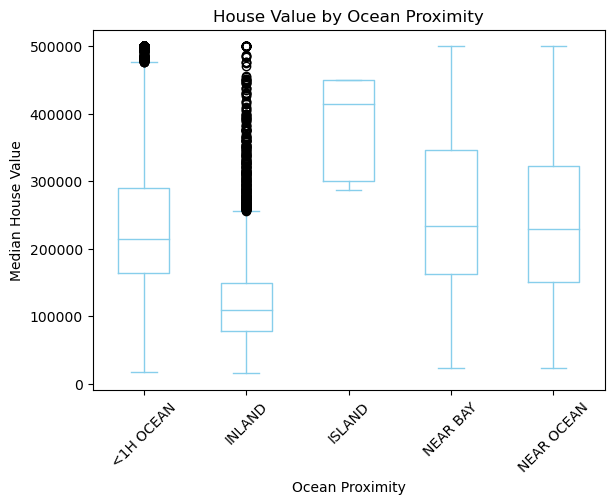

In [13]:
df.groupby("ocean_proximity")["median_house_value"].median().sort_values()

plt.figure()
df.boxplot(
    column="median_house_value",
    by="ocean_proximity",
    grid=False,
    rot=45,
    color='skyblue'
)
plt.title("House Value by Ocean Proximity")
plt.suptitle("")
plt.xlabel("Ocean Proximity")
plt.ylabel("Median House Value")
plt.show()

<a id="libraries"></a>
# <b><span style='color:#a9defe'>Step 4 |</span><span style='color:#006e8a'> Fill the Missing Value</span></b>

In [14]:
# pastikan tipe data numerik
df["total_bedrooms"] = pd.to_numeric(df["total_bedrooms"], errors="coerce")

# hitung median & isi NaN
median_tb = df["total_bedrooms"].median()
df["total_bedrooms"] = df["total_bedrooms"].fillna(median_tb)


<a id="libraries"></a>
# <b><span style='color:#a9defe'>Step 5 |</span><span style='color:#006e8a'> Feature Engineering</span></b>

In [15]:
df["rooms_per_household"] = df["total_rooms"] / df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"] / df["total_rooms"]
df["population_per_household"] = df["population"] / df["households"]

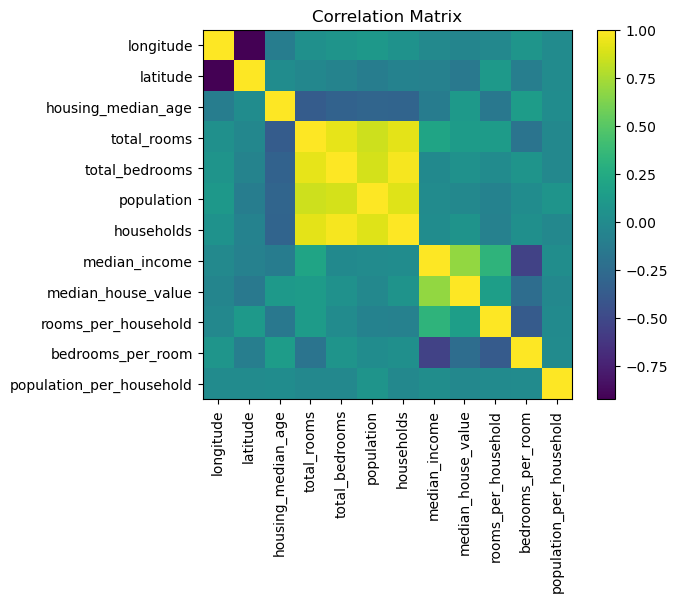

In [16]:
corr = df.corr(numeric_only=True)

plt.figure()
plt.imshow(corr)
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Matrix")
plt.show()

<a id="libraries"></a>
# <b><span style='color:#a9defe'>Step 6 |</span><span style='color:#006e8a'> One Hot Encoding</span></b>

In [18]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(
    sparse_output=False,
    drop="first",
    handle_unknown="ignore"
)

encoded = ohe.fit_transform(df[["ocean_proximity"]])

encoded_df = pd.DataFrame(
    encoded,
    columns=ohe.get_feature_names_out(["ocean_proximity"]),
    index=df.index          # 🔥 INI PENTING
)

df = pd.concat(
    [df.drop(columns=["ocean_proximity"]), encoded_df],
    axis=1
)


<a id="libraries"></a>
# <b><span style='color:#a9defe'>Step 7 |</span><span style='color:#006e8a'> Splitting Dataset</span></b>

In [19]:
X = df.drop(columns=['median_house_value'])
y = df[['median_house_value']]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [20]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
7061,-118.02,33.93,35.0,2400.0,398.0,1218.0,408.0,4.1312,5.882353,0.165833,2.985294,0.0,0.0,0.0,0.0
14689,-117.09,32.79,20.0,2183.0,534.0,999.0,496.0,2.8631,4.401210,0.244617,2.014113,0.0,0.0,0.0,1.0
17323,-120.14,34.59,24.0,1601.0,282.0,731.0,285.0,4.2026,5.617544,0.176140,2.564912,0.0,0.0,0.0,1.0
10056,-121.00,39.26,14.0,810.0,151.0,302.0,138.0,3.1094,5.869565,0.186420,2.188406,1.0,0.0,0.0,0.0
15750,-122.45,37.77,52.0,3188.0,708.0,1526.0,664.0,3.3068,4.801205,0.222083,2.298193,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,6.129032,0.151128,3.032258,0.0,0.0,0.0,0.0
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,6.868597,0.184825,3.904232,1.0,0.0,0.0,0.0
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,3.986717,0.270823,3.332068,0.0,0.0,0.0,0.0
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,6.395349,0.166993,3.178891,0.0,0.0,0.0,0.0


In [21]:
X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
20046,-119.01,36.06,25.0,1505.0,435.0,1392.0,359.0,1.6812,4.192201,0.289037,3.877437,1.0,0.0,0.0,0.0
3024,-119.46,35.14,30.0,2943.0,435.0,1565.0,584.0,2.5313,5.039384,0.147808,2.679795,1.0,0.0,0.0,0.0
15663,-122.44,37.80,52.0,3830.0,435.0,1310.0,963.0,3.4801,3.977155,0.113577,1.360332,0.0,0.0,1.0,0.0
20484,-118.72,34.28,17.0,3051.0,435.0,1705.0,495.0,5.7376,6.163636,0.142576,3.444444,0.0,0.0,0.0,0.0
9814,-121.93,36.62,34.0,2351.0,435.0,1063.0,428.0,3.7250,5.492991,0.185028,2.483645,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17505,-121.90,37.36,47.0,1007.0,245.0,581.0,240.0,2.9545,4.195833,0.243297,2.420833,0.0,0.0,0.0,0.0
13512,-117.32,34.11,41.0,1229.0,302.0,994.0,270.0,1.4891,4.551852,0.245728,3.681481,1.0,0.0,0.0,0.0
10842,-117.91,33.67,16.0,7961.0,2276.0,5014.0,2116.0,3.5120,3.762287,0.285894,2.369565,0.0,0.0,0.0,0.0
16559,-121.28,37.82,10.0,9205.0,1774.0,5935.0,1673.0,3.6500,5.502092,0.192721,3.547519,1.0,0.0,0.0,0.0


<a id="libraries"></a>
# <b><span style='color:#a9defe'>Step 8 |</span><span style='color:#006e8a'> Standardization</span></b>

In [22]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

numerical_features = X.columns.to_list()
for n in numerical_features:
    scaler = ss.fit(X_train[[n]])
    X_train[n] = scaler.transform(X_train[[n]])
    X_test[n] = scaler.transform(X_test[[n]])

<a id="libraries"></a>
# <b><span style='color:#a9defe'>Step 9 |</span><span style='color:#006e8a'> Modeling & Evaluation</span></b>

<a id="libraries"></a>
# <b><span style='color:#006e8a'> Linear Regression</span></b>

In [23]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

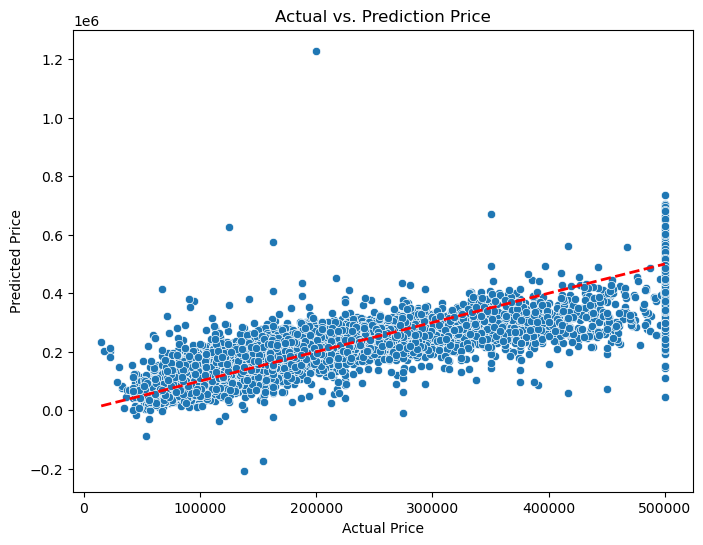

In [24]:
#Ratakan menjadi 1D array
y_test_flatten = y_test.values.flatten()
y_pred_flatten = y_pred.flatten()

# Scatter plot
plt.figure(figsize=(8, 6))
plot = sns.scatterplot(x=y_test_flatten, y=y_pred_flatten).set(title='Actual vs. Prediction Price',
                                                          xlabel='Actual Price',
                                                          ylabel='Predicted Price')

# Plotting the regression line
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], linestyle='--', color='red', linewidth=2)



In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import cross_validate

def eval_regression(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    print('RMSE (test): ' + str(mean_squared_error(y_test, y_pred, squared=False)))
    print('RMSE (train): ' + str(mean_squared_error(y_train, y_pred_train, squared=False)))

    print('MAPE (test): ' + str(mean_absolute_percentage_error(y_test, y_pred)))
    print('MAPE (train): ' + str(mean_absolute_percentage_error(y_train, y_pred_train)))

    print('r2 (test): ' + str(r2_score(y_test, y_pred)))
    print('r2 (train): ' + str(r2_score(y_train, y_pred_train)))

# k-fold cross validation
    score = cross_validate(model, X, y, cv=5, scoring='r2', return_train_score=True)
    print('r2 (cross-val test): ' + str(score['test_score'].mean()))
    print('r2 (cross-val train): ' + str(score['train_score'].mean()))

eval_regression(regressor)


RMSE (test): 70437.08265222448
RMSE (train): 67881.61208813675
MAPE (test): 0.29388056958093656
MAPE (train): 0.28253935907371025
r2 (test): 0.6220014471923554
r2 (train): 0.6560478394225187
r2 (cross-val test): 0.5648715155124917
r2 (cross-val train): 0.653062006413714


<a id="libraries"></a>
# <b><span style='color:#006e8a'> Random Forest Regression</span></b>

In [27]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf_regressor.fit(X_train, y_train)

y_pred_rf = rf_regressor.predict(X_test)


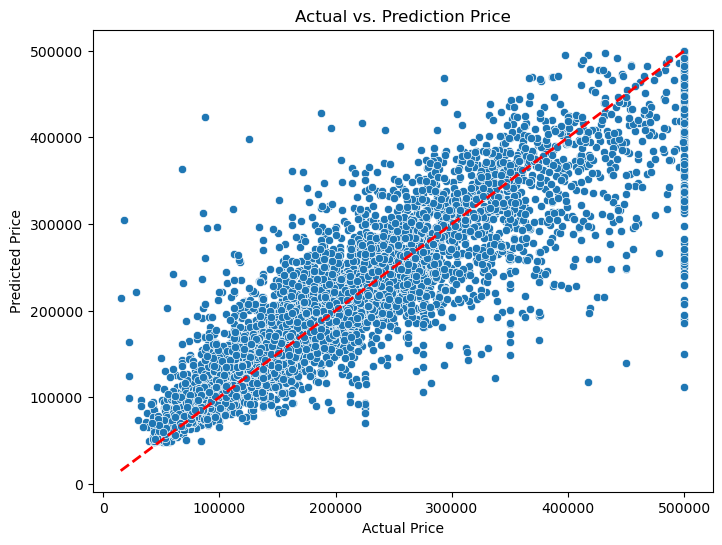

In [29]:
#Ratakan menjadi 1D array
y_test_flatten = y_test.values.flatten()
y_pred_flatten = y_pred_rf.flatten()

# Scatter plot
plt.figure(figsize=(8, 6))
plot = sns.scatterplot(x=y_test_flatten, y=y_pred_flatten).set(title='Actual vs. Prediction Price',
                                                          xlabel='Actual Price',
                                                          ylabel='Predicted Price')

# Plotting the regression line
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], linestyle='--', color='red', linewidth=2)



In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import cross_validate

def eval_regression(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    print('RMSE (test): ' + str(mean_squared_error(y_test, y_pred, squared=False)))
    print('RMSE (train): ' + str(mean_squared_error(y_train, y_pred_train, squared=False)))

    print('MAPE (test): ' + str(mean_absolute_percentage_error(y_test, y_pred)))
    print('MAPE (train): ' + str(mean_absolute_percentage_error(y_train, y_pred_train)))

    print('r2 (test): ' + str(r2_score(y_test, y_pred)))
    print('r2 (train): ' + str(r2_score(y_train, y_pred_train)))

# k-fold cross validation
    score = cross_validate(model, X, y, cv=5, scoring='r2', return_train_score=True)
    print('r2 (cross-val test): ' + str(score['test_score'].mean()))
    print('r2 (cross-val train): ' + str(score['train_score'].mean()))

eval_regression(rf_regressor)


RMSE (test): 49687.47272060266
RMSE (train): 18662.41886637623
MAPE (test): 0.1829680955154537
MAPE (train): 0.06625114765136281
r2 (test): 0.8119032758951126
r2 (train): 0.9740026182207914
r2 (cross-val test): 0.598728805632007
r2 (cross-val train): 0.9760759806363225


<a id="libraries"></a>
# <b><span style='color:#006e8a'> Gradient Boosting Regression</span></b>

In [31]:
from sklearn.ensemble import GradientBoostingRegressor

gb_regressor = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

gb_regressor.fit(X_train, y_train)

y_pred_gb = gb_regressor.predict(X_test)


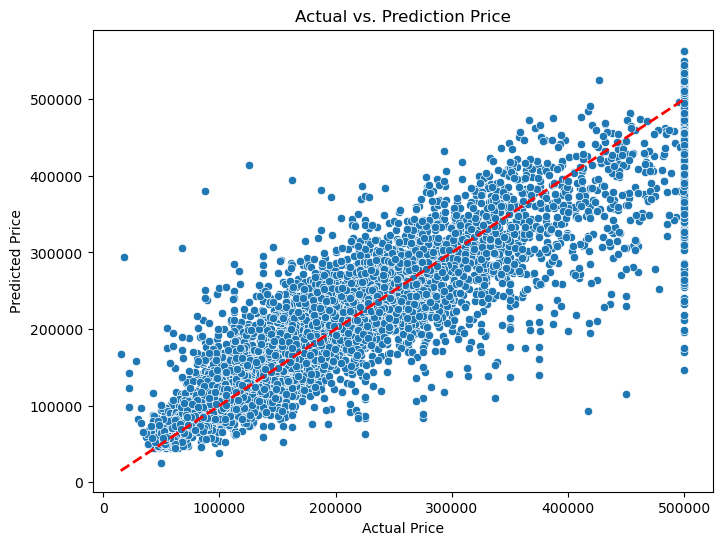

In [32]:
#Ratakan menjadi 1D array
y_test_flatten = y_test.values.flatten()
y_pred_flatten = y_pred_gb.flatten()

# Scatter plot
plt.figure(figsize=(8, 6))
plot = sns.scatterplot(x=y_test_flatten, y=y_pred_flatten).set(title='Actual vs. Prediction Price',
                                                          xlabel='Actual Price',
                                                          ylabel='Predicted Price')

# Plotting the regression line
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], linestyle='--', color='red', linewidth=2)



In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import cross_validate

def eval_regression(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    print('RMSE (test): ' + str(mean_squared_error(y_test, y_pred, squared=False)))
    print('RMSE (train): ' + str(mean_squared_error(y_train, y_pred_train, squared=False)))

    print('MAPE (test): ' + str(mean_absolute_percentage_error(y_test, y_pred)))
    print('MAPE (train): ' + str(mean_absolute_percentage_error(y_train, y_pred_train)))

    print('r2 (test): ' + str(r2_score(y_test, y_pred)))
    print('r2 (train): ' + str(r2_score(y_train, y_pred_train)))

# k-fold cross validation
    score = cross_validate(model, X, y, cv=5, scoring='r2', return_train_score=True)
    print('r2 (cross-val test): ' + str(score['test_score'].mean()))
    print('r2 (cross-val train): ' + str(score['train_score'].mean()))

eval_regression(gb_regressor)


RMSE (test): 51614.15110172549
RMSE (train): 47998.09182098389
MAPE (test): 0.199903219966049
MAPE (train): 0.18540827293608375
r2 (test): 0.7970332046927784
r2 (train): 0.8280343557645794
r2 (cross-val test): 0.6465937910201678
r2 (cross-val train): 0.8303535253516594


<a id="libraries"></a>
# <b><span style='color:#006e8a'> Hypertuning Gradient Boosting Regression</span></b>

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [2, 3, 4],
    'subsample': [0.8, 1.0]
}

grid_search = GridSearchCV(
    estimator=gb,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

best_gb = grid_search.best_estimator_

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 300, 'subsample': 1.0}


In [39]:
from sklearn.ensemble import GradientBoostingRegressor

gb_regressor = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=4,
    subsample=1.0,
    random_state=42
)

gb_regressor.fit(X_train, y_train)

y_pred_gb = gb_regressor.predict(X_test)


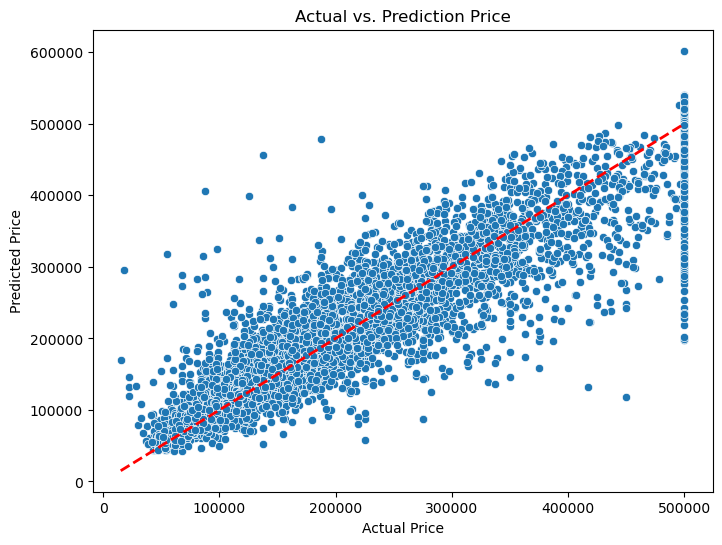

In [40]:
#Ratakan menjadi 1D array
y_test_flatten = y_test.values.flatten()
y_pred_flatten = y_pred_gb.flatten()

# Scatter plot
plt.figure(figsize=(8, 6))
plot = sns.scatterplot(x=y_test_flatten, y=y_pred_flatten).set(title='Actual vs. Prediction Price',
                                                          xlabel='Actual Price',
                                                          ylabel='Predicted Price')

# Plotting the regression line
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], linestyle='--', color='red', linewidth=2)



In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import cross_validate

def eval_regression(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    print('RMSE (test): ' + str(mean_squared_error(y_test, y_pred, squared=False)))
    print('RMSE (train): ' + str(mean_squared_error(y_train, y_pred_train, squared=False)))

    print('MAPE (test): ' + str(mean_absolute_percentage_error(y_test, y_pred)))
    print('MAPE (train): ' + str(mean_absolute_percentage_error(y_train, y_pred_train)))

    print('r2 (test): ' + str(r2_score(y_test, y_pred)))
    print('r2 (train): ' + str(r2_score(y_train, y_pred_train)))

# k-fold cross validation
    score = cross_validate(model, X, y, cv=5, scoring='r2', return_train_score=True)
    print('r2 (cross-val test): ' + str(score['test_score'].mean()))
    print('r2 (cross-val train): ' + str(score['train_score'].mean()))

eval_regression(gb_regressor)


RMSE (test): 47829.86642359183
RMSE (train): 37536.83000974267
MAPE (test): 0.18285246793144996
MAPE (train): 0.14536903955336064
r2 (test): 0.8257046692531955
r2 (train): 0.8948258686393009
r2 (cross-val test): 0.6450002413037763
r2 (cross-val train): 0.8943007242663423


In [42]:
y_pred_test = gb_regressor.predict(X_test)

hasil_prediksi_gb = X_test.copy()

hasil_prediksi_gb["Actual_Price"] = y_test.values
hasil_prediksi_gb["Predicted_Price"] = y_pred_gb
hasil_prediksi_gb["Error"] = hasil_prediksi_gb["Predicted_Price"] - hasil_prediksi_gb["Actual_Price"]

hasil_prediksi_gb.sample(10)



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,Actual_Price,Predicted_Price,Error
4672,0.646127,-0.749493,0.192229,0.080010,1.696567,2.366345,1.828662,-0.957503,-1.259348,3.962655,0.025789,-0.684864,-0.016641,-0.355491,-0.376887,229200.0,234804.965132,5604.965132
17748,-1.081402,0.767596,-1.076283,-0.535807,-0.547507,-0.853306,-0.536542,0.241284,-0.170311,-0.076072,-0.127863,-0.684864,-0.016641,-0.355491,-0.376887,221000.0,229666.902382,8666.902382
14284,1.225298,-1.372249,-1.551976,-0.096598,0.429213,0.308785,0.397505,-1.074625,-0.696010,1.414037,-0.031791,-0.684864,-0.016641,-0.355491,2.653312,137500.0,120902.911252,-16597.088748
16510,-0.786823,0.973621,-1.710540,1.068462,0.955689,1.384049,1.082995,-0.227993,-0.008857,-0.397268,0.013417,1.460143,-0.016641,-0.355491,-0.376887,139000.0,135298.002846,-3701.997154
15224,1.160391,-1.217731,-1.155565,-0.148841,-0.397426,-0.325322,-0.337697,1.246512,0.328716,-0.899427,-0.022455,-0.684864,-0.016641,-0.355491,2.653312,240900.0,302013.859607,61113.859607
16739,-1.420916,0.964256,-0.362745,0.764714,0.755581,0.720122,0.750715,0.384761,0.007116,-0.234847,-0.021431,-0.684864,-0.016641,2.813008,-0.376887,290400.0,290001.571927,-398.428073
10356,0.955684,-0.960200,-0.283463,0.239975,-0.216375,0.078121,-0.125771,1.530420,0.630297,-1.219191,0.018552,-0.684864,-0.016641,-0.355491,-0.376887,266000.0,288316.565417,22316.565417
10476,0.945698,-0.960200,-0.917719,-0.228823,-0.426013,-0.205166,-0.434503,0.832252,0.399345,-0.773663,0.035960,-0.684864,-0.016641,-0.355491,-0.376887,227000.0,221142.952028,-5857.047972
5460,0.556255,-0.772905,0.667922,-0.027249,0.536414,0.327203,0.617280,-0.668135,-0.786353,1.418444,-0.054597,-0.684864,-0.016641,-0.355491,-0.376887,305800.0,322276.596880,16476.596880
9622,-0.367423,0.767596,0.747204,-0.956523,-0.249727,-0.833134,-1.017955,-0.807779,-0.120346,9.290917,0.092831,1.460143,-0.016641,-0.355491,-0.376887,59600.0,133137.275888,73537.275888
